In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
df_train = pd.read_csv('train.csv')
df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [361]:
df_train.BHK_OR_RK.value_counts() #initial count check

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64

In [362]:
df_train.POSTED_BY.value_counts()

POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

In [363]:
#converting the categorical BHK OR RK column to integer column
temp = []
for stuff in  df_train.BHK_OR_RK:
    if stuff == 'BHK':
        temp.append(1)
    else:
        temp.append(0)
df_train.BHK_OR_RK = temp
df_train.BHK_OR_RK.unique()

array([1, 0])

In [364]:
df_train.BHK_OR_RK.value_counts() #just checking in case yk

BHK_OR_RK
1    29427
0       24
Name: count, dtype: int64

In [365]:
df_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,0.999185,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,0.028536,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,0.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,1.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,1.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


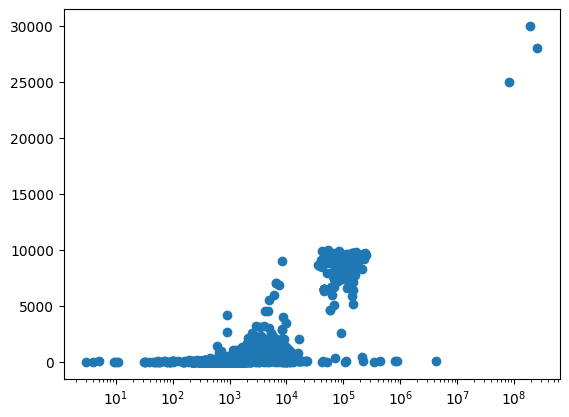

In [366]:
plt.scatter(df_train['SQUARE_FT'], df_train['TARGET(PRICE_IN_LACS)'])
plt.xscale('log')
plt.show()

In [367]:
# sns.lineplot(x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)', data=df_train)
# plt.xscale('log')
# plt.show

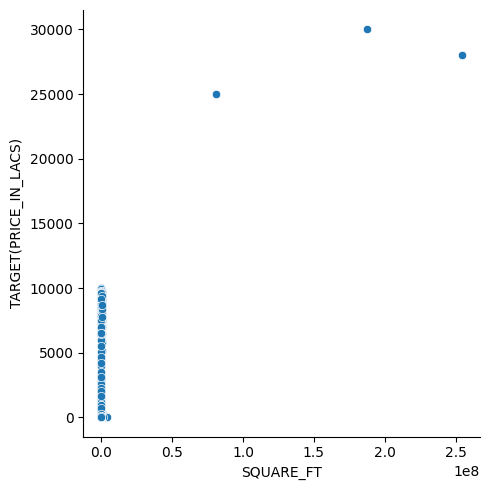

In [368]:
sns.relplot(data=df_train,kind='scatter',x=df_train['SQUARE_FT'],y=df_train['TARGET(PRICE_IN_LACS)'])

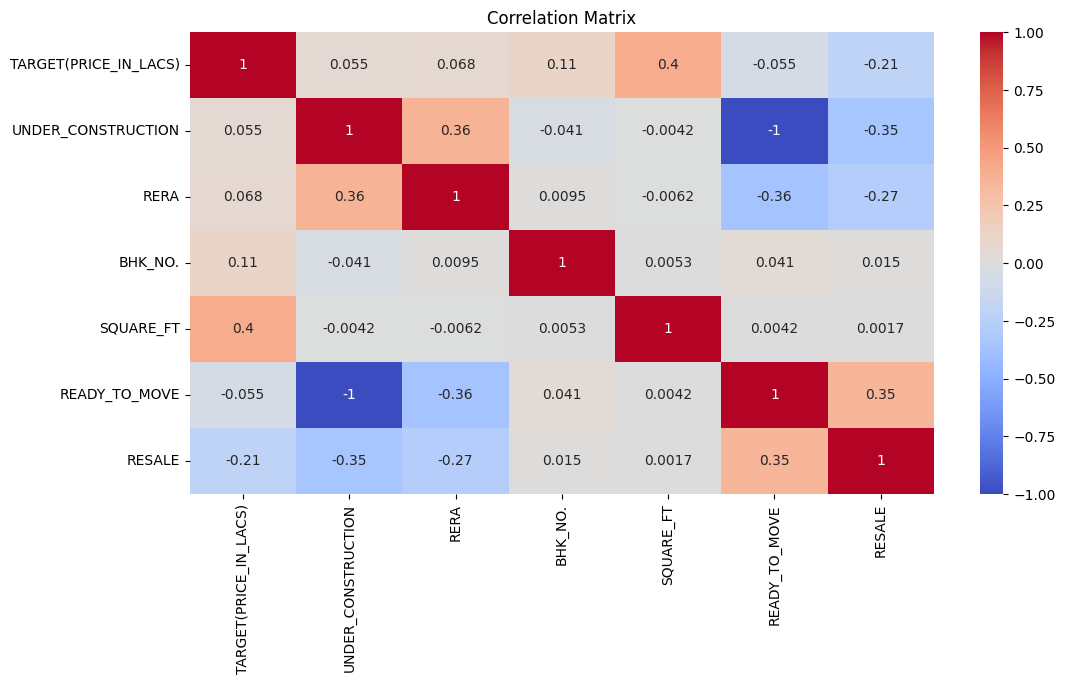

In [369]:
correl = df_train[['TARGET(PRICE_IN_LACS)','UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT','READY_TO_MOVE','RESALE']].corr()
plt.figure(figsize=(12,6))
plt.title("Correlation Matrix")
sns.heatmap(correl,annot=True,cmap='coolwarm')
plt.show()


In [370]:
df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,1,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,1,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,1,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [371]:
df_test = pd.read_csv("test.csv")
df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [372]:
temp = []
for stuff in  df_test.BHK_OR_RK:
    if stuff == 'BHK':
        temp.append(1)
    else:
        temp.append(0)
df_test.BHK_OR_RK = temp
df_test.BHK_OR_RK.unique()

array([1, 0])

In [373]:
df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,1,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,1,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,1,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,1,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,1,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [374]:
from sklearn.preprocessing import StandardScaler

In [375]:
scaler = StandardScaler()

In [376]:
sqft_scale = scaler.fit_transform(df_train[["SQUARE_FT"]])
df_train["SQUARE_FT"] = sqft_scale
uc_scale = scaler.fit_transform(df_train[['UNDER_CONSTRUCTION']])
df_train['UNDER_CONSTRUCTION'] = uc_scale
rtm_scale = scaler.fit_transform(df_train[['READY_TO_MOVE']])
df_train['READY_TO_MOVE'] = rtm_scale
resale_scale = scaler.fit_transform(df_train[['RESALE']])
df_train['RESALE'] = resale_scale
rera_scale = scaler.fit_transform(df_train[['RERA']])
df_train['RERA'] = rera_scale
bhk_scale = scaler.fit_transform(df_train[['BHK_OR_RK']])
df_train['BHK_OR_RK'] = bhk_scale
bhkno_scale = scaler.fit_transform(df_train[['BHK_NO.']])
df_train['BHK_NO.'] = bhkno_scale

df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,-0.468134,-0.682715,-0.44624,0.028558,-0.009731,0.468134,0.27524,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,-0.468134,-0.682715,-0.44624,0.028558,-0.009744,0.468134,0.27524,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,-0.468134,-0.682715,-0.44624,0.028558,-0.009924,0.468134,0.27524,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,-0.468134,1.464741,-0.44624,0.028558,-0.009926,0.468134,0.27524,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,2.136139,-0.682715,-0.44624,0.028558,-0.009890,-2.136139,0.27524,"New Town,Kolkata",22.592200,88.484911,60.5


In [377]:
sqft_scale = scaler.fit_transform(df_test[["SQUARE_FT"]])
df_test["SQUARE_FT"] = sqft_scale
rtm_scale = scaler.fit_transform(df_test[['READY_TO_MOVE']])
df_test['READY_TO_MOVE'] = rtm_scale
uc_scale = scaler.fit_transform(df_test[['UNDER_CONSTRUCTION']])
df_test['UNDER_CONSTRUCTION'] = uc_scale
resale_scale = scaler.fit_transform(df_test[['RESALE']])
df_test['RESALE'] = resale_scale
rera_scale = scaler.fit_transform(df_test[['RERA']])
df_test['RERA'] = rera_scale
bhk_scale = scaler.fit_transform(df_test[['BHK_OR_RK']])
df_test['BHK_OR_RK'] = bhk_scale
bhkno_scale = scaler.fit_transform(df_test[['BHK_NO.']])
df_test['BHK_NO.'] = bhkno_scale

df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,-0.463048,-0.680532,-1.605650,0.029064,-0.013512,0.463048,0.266907,"Kamrej,Surat",21.262000,73.047700
1,Dealer,2.159605,1.469439,-0.449007,0.029064,-0.011959,-2.159605,-3.746625,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,-0.463048,-0.680532,-0.449007,0.029064,-0.009173,0.463048,0.266907,"New Town,Kolkata",22.592200,88.484911
3,Dealer,-0.463048,-0.680532,0.707636,0.029064,-0.008300,0.463048,0.266907,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,-0.463048,-0.680532,-1.605650,0.029064,-0.014211,0.463048,0.266907,"Mai Mandir,Nadiad",22.700000,72.870000


In [378]:
df_train.to_csv("train_pp.csv")
df_test.to_csv("test_pp.csv")